#### Plot and sample the Normal distribution


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import cumulative_trapezoid

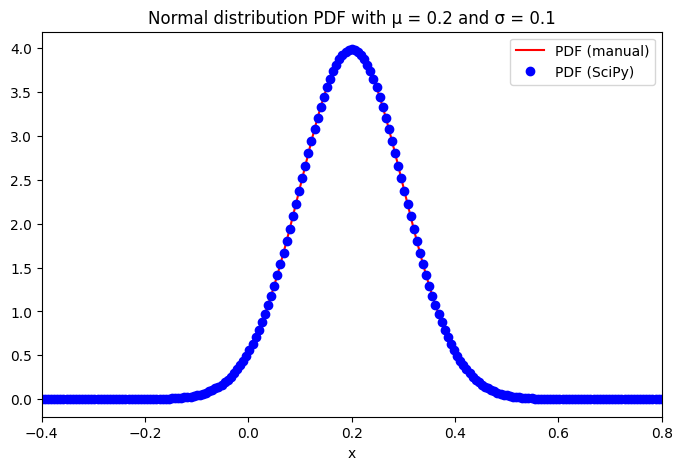

In [9]:
# %% Define parameters
mu = 0.2          # mean
sigma = 0.1       # standard deviation
a = -0.4          # left truncation
b = 0.8           # right truncation
ngrid = 200       # number of grid intervals
nsample = 10**6   # number of random samples

# %% Define grid
deltax = (b - a) / ngrid
x = np.arange(a, b + deltax, deltax)  # include upper bound

# %% Compute and plot the PDF and CDF
f1 = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) / sigma)**2 / 2)
f = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, f1, 'r', label='PDF (manual)')
plt.plot(x, f, 'bo', label='PDF (SciPy)')
plt.xlim([a, b])
plt.xlabel('x')
plt.legend()
plt.title('Normal distribution PDF with μ = 0.2 and σ = 0.1')
plt.savefig('normal.png', dpi=150)
plt.show()

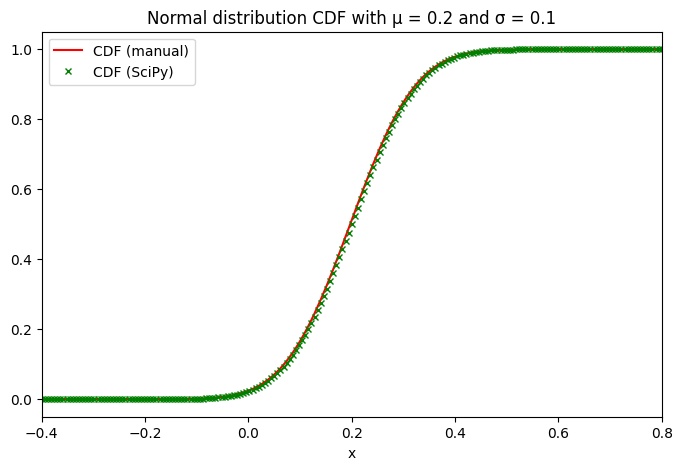

In [25]:
# a)

F1 = np.cumsum(f1*deltax)
F = norm.cdf(x, mu, sigma)
plt.figure(figsize=(8, 5))
plt.plot(x, F1, 'r', label='CDF (manual cumsum)')
plt.plot(x, F, 'gx', markersize = 4, label='CDF (SciPy)')
plt.xlim([a, b])
plt.xlim([a, b])
plt.xlabel('x')
plt.legend()
plt.title('Normal distribution CDF with μ = 0.2 and σ = 0.1')
plt.savefig('normal.png', dpi=150)
plt.show()

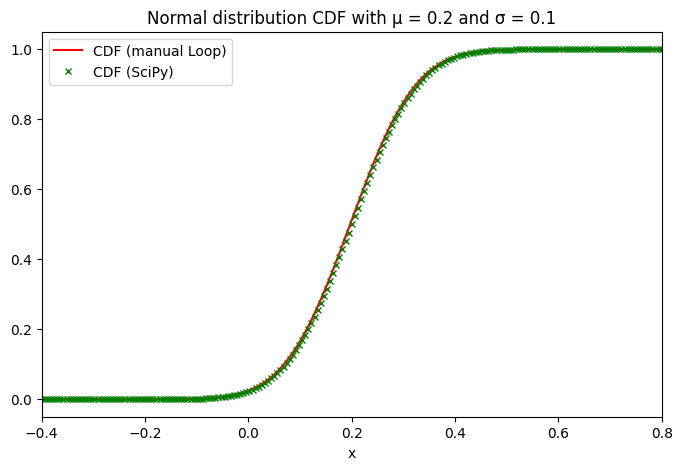

In [31]:
# b)

F2 = np.zeros(ngrid+1, dtype=float)
F2[0] = 0

for i in range(1, ngrid+1):
    F2[i] = F2[i-1] + f1[i]*deltax

F = norm.cdf(x, mu, sigma)
plt.figure(figsize=(8, 5))
plt.plot(x, F2, 'r', label='CDF (manual Loop)')
plt.plot(x, F, 'gx', markersize = 4, label='CDF (SciPy)')
plt.xlim([a, b])
plt.xlim([a, b])
plt.xlabel('x')
plt.legend()
plt.title('Normal distribution CDF with μ = 0.2 and σ = 0.1')
plt.savefig('normal.png', dpi=150)
plt.show()

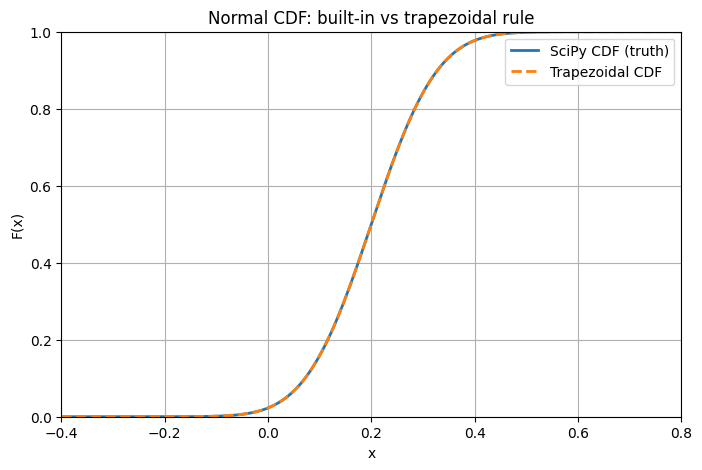

Max abs error (trapezoid): 7.257190853404705e-05


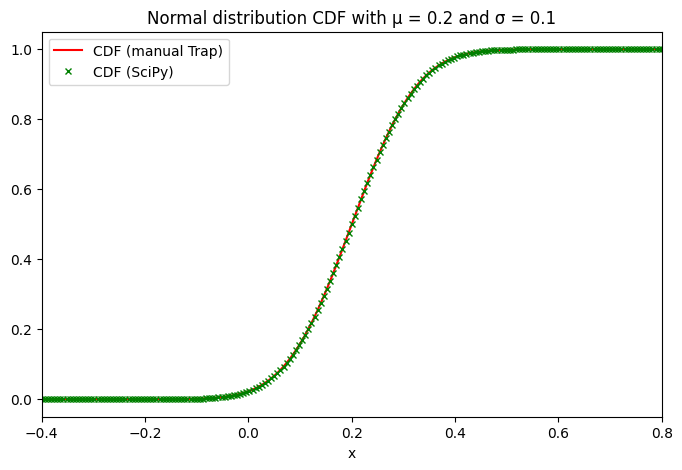

In [46]:
# c) Trapezoidal-rule CDF using cumulative trapezoid
import numpy as np
from scipy.integrate import cumulative_trapezoid

# F3[k] ≈ ∫_a^{x_k} f(t) dt with trapezoidal weights (1/2,1,...,1,1/2)
F = norm.cdf(x, mu, sigma)
F3 = cumulative_trapezoid(f, x, initial=0.0)  # integrates w.r.t. x directly

# Compare to SciPy's exact normal CDF
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(x, F, label='SciPy CDF (truth)', linewidth=2)
plt.plot(x, F3, '--', label='Trapezoidal CDF', linewidth=2)
plt.xlim([a, b]); plt.ylim([0, 1])
plt.xlabel('x'); plt.ylabel('F(x)')
plt.title('Normal CDF: built-in vs trapezoidal rule')
plt.legend(); plt.grid(True)
plt.show()

print("Max abs error (trapezoid):", np.max(np.abs(F3 - F)))

plt.figure(figsize=(8, 5))
plt.plot(x, F3, 'r', label='CDF (manual Trap)')
plt.plot(x, F, 'gx', markersize = 4, label='CDF (SciPy)')
plt.xlim([a, b])
plt.xlim([a, b])
plt.xlabel('x')
plt.legend()
plt.title('Normal distribution CDF with μ = 0.2 and σ = 0.1')
plt.savefig('normal.png', dpi=150)
plt.show()

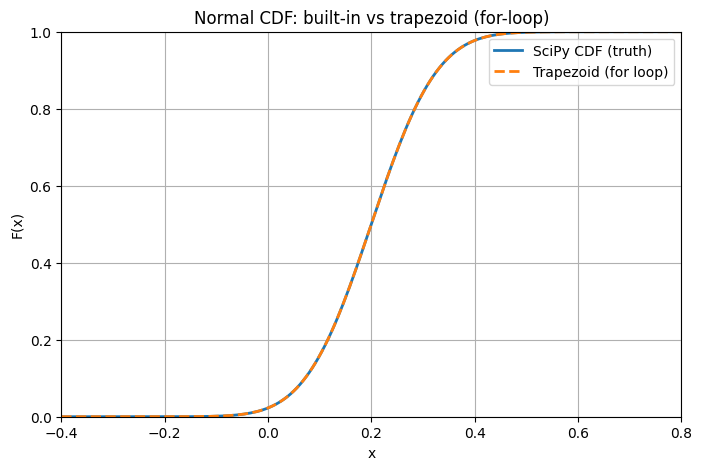

Max abs error (trapezoid for-loop): 7.257190853471318e-05


In [47]:
# d) Trapezoidal-rule CDF via for-loop (no sum, no trapz)
F4 = np.zeros_like(x)

for k in range(1, len(x)):
    # Compute trapezoid area between x[k-1] and x[k]
    area = 0.5 * (f[k-1] + f[k]) * deltax
    # Add it incrementally
    F4[k] = F4[k-1] + area

# Compare with built-in CDF
plt.figure(figsize=(8, 5))
plt.plot(x, F, label='SciPy CDF (truth)', linewidth=2)
plt.plot(x, F4, '--', label='Trapezoid (for loop)', linewidth=2)
plt.xlim([a, b]); plt.ylim([0, 1])
plt.xlabel('x'); plt.ylabel('F(x)')
plt.title('Normal CDF: built-in vs trapezoid (for-loop)')
plt.legend(); plt.grid(True)
plt.show()

print("Max abs error (trapezoid for-loop):", np.max(np.abs(F_trap_loop - F)))

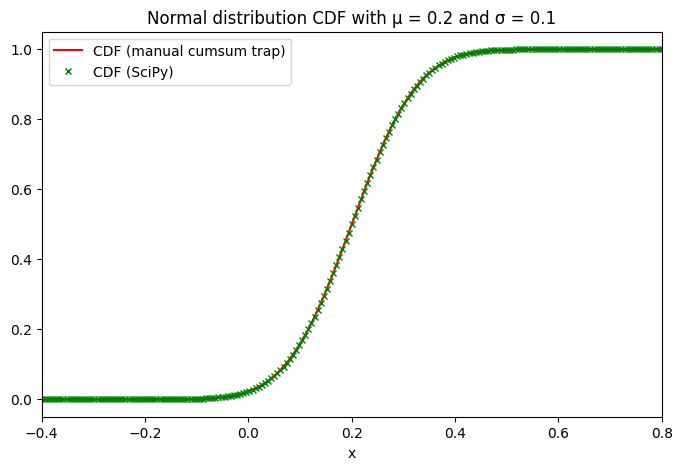

In [48]:
# (e) Trapezoidal rule via correction vector with cumsum
weights = np.ones_like(f)           # start with all 1s
weights[0] = 0.5                    # first weight = 1/2
weights[-1] = 0.5                   # last weight = 1/2

# cumulative trapezoidal integral approximation
F5 = np.cumsum(f * weights) * deltax

# normalise so last value = 1 (minor correction for numerical rounding)
F5 /= F5[-1]

# comparison with analytical CDF
F_exact = norm.cdf(x, mu, sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, F3, 'r', label='CDF (manual cumsum trap)')
plt.plot(x, F, 'gx', markersize = 4, label='CDF (SciPy)')
plt.xlim([a, b])
plt.xlim([a, b])
plt.xlabel('x')
plt.legend()
plt.title('Normal distribution CDF with μ = 0.2 and σ = 0.1')
plt.savefig('normal.png', dpi=150)
plt.show()

In [53]:
# f)
print(F[:10],"\n", F[-10:])
print(F2[:10],"\n", F2[-10:])
print(F3[:10],"\n", F3[-10:])
print(F4[:10],"\n", F4[-10:])
print(F5[:10],"\n", F5[-10:])

[9.86587645e-10 1.42511038e-09 2.05133241e-09 2.94238137e-09
 4.20569680e-09 5.99037140e-09 8.50250822e-09 1.20259292e-08
 1.69499831e-08 2.38067292e-08] 
 [0.99999998 0.99999998 0.99999999 0.99999999 0.99999999 1.
 1.         1.         1.         1.        ]
[0.00000000e+00 5.21584798e-10 1.26516146e-09 2.32140268e-09
 3.81638830e-09 5.92476135e-09 8.88750749e-09 1.30358821e-08
 1.88234756e-08 2.68690051e-08] 
 [0.99999998 0.99999998 0.99999999 0.99999999 0.99999999 1.
 1.         1.         1.         1.        ]
[0.00000000e+00 4.43068885e-10 1.07564961e-09 1.97555855e-09
 3.25117197e-09 5.05285131e-09 7.58841091e-09 1.11439713e-08
 1.61119553e-08 2.30285168e-08] 
 [0.99999997 0.99999998 0.99999999 0.99999999 0.99999999 0.99999999
 1.         1.         1.         1.        ]
[0.00000000e+00 4.43068885e-10 1.07564961e-09 1.97555855e-09
 3.25117197e-09 5.05285131e-09 7.58841091e-09 1.11439713e-08
 1.61119553e-08 2.30285168e-08] 
 [0.99999997 0.99999998 0.99999999 0.99999999 0.999999

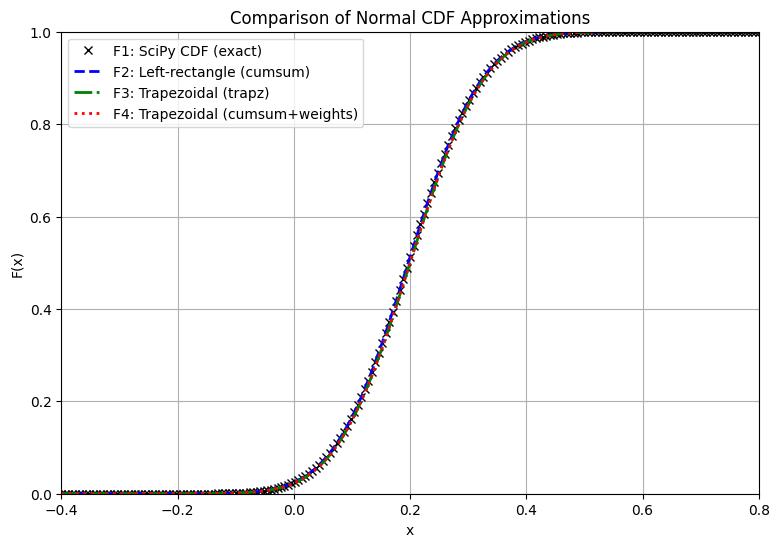

Max abs error vs exact:
F2 (left-rect): 3.646e-10
F3 (trapz):     1.197e-02
F4 (weights):   1.197e-02


In [55]:
# g)

plt.figure(figsize=(9, 6))
plt.plot(x, F1, 'kx', linewidth=2, label='F1: SciPy CDF (exact)')
plt.plot(x, F2, 'b--', linewidth=2, label='F2: Left-rectangle (cumsum)')
plt.plot(x, F3, 'g-.', linewidth=2, label='F3: Trapezoidal (trapz)')
plt.plot(x, F4, 'r:', linewidth=2, label='F4: Trapezoidal (cumsum+weights)')
plt.xlim([a, b]); plt.ylim([0, 1])
plt.xlabel('x'); plt.ylabel('F(x)')
plt.title('Comparison of Normal CDF Approximations')
plt.legend()
plt.grid(True)
plt.show()

# %% Print errors for reference
print("Max abs error vs exact:")
print(f"F2 (left-rect): {np.max(np.abs(F2 - F1)):.3e}")
print(f"F3 (trapz):     {np.max(np.abs(F3 - F1)):.3e}")
print(f"F4 (weights):   {np.max(np.abs(F4 - F1)):.3e}")